In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
np.random.seed(170)

In [151]:
combinedchis = pd.read_csv("data/combined_chis.csv")

## Separate input and output variables

In [152]:
X = combinedchis.iloc[:,:-1]
X

,AA5C,AB1,AB100,AB112,AB113,AB115,AB117,AB118,AB119,AB127,...,AH141,SREDUC,AJ153V2_13,AJ154BV2_8,AJ154BV2_9,INS64_S,AK20_P1,AJ174_8,AJ174_9,AJ194_18
0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.0,5.0,-1.0,-1.0,-1.0,2.0,2.0,2.0,-1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.0,2.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189118,-1.0,2.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,3.0,-1.0,-1.0,-1.0,5.0,4.0,-1.0,-1.0,-1.0
189119,-1.0,1.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,4.0,-1.0,2.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0
189120,-1.0,2.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
189121,-1.0,3.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [153]:
X['AH102_P1']

0        -1.0
1        -1.0
2        -1.0
3         2.0
4        -1.0
         ... 
189118    NaN
189119    NaN
189120    NaN
189121    NaN
189122    NaN
Name: AH102_P1, Length: 189123, dtype: float64

In [154]:
y = combinedchis.iloc[:, -1]
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
189118    0.0
189119    0.0
189120    0.0
189121    0.0
189122    0.0
Name: T2D, Length: 189123, dtype: float64

## Split training and test data

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, stratify=y)

## Fill NaN values and remove features

In [156]:
# remove id feature and features that already imply diabetes
diabetes_features = [
    "PUF1Y_ID", "AB111", "AB23_P1", "AB114_P1", "AJ82", "AB22V2", "DIABETES", "AB81", "AB113", 
    "AB112", "AB51_P1", "AB110_P", "AB109", "AB24", "DIAMED", "AB25", "AB63", "AB27_P1", "AB28_P1",
    "AB26_P1", "DIABCK_P1", "AB27_P", "AJ80", 'AH102_P', 'AH102_P1'
]
similar_features = ["WEIGHK_P", "WGHTK_P", "HEIGHM_P", "HGHTM_P", "WHOBMI"]
remove_features = diabetes_features + similar_features
X_train = X_train.drop(remove_features, axis=1)
X_test = X_test.drop(remove_features, axis=1)
X_train.shape

(132386, 754)

In [158]:
numerical_features = list(set([
    "HHSIZE_P1", "AC46", "AE2", "AE_FRUIT", "AE7", "AE_VEGI", "HGHTI_P", "HGHTM_P", "HEIGHM_P", "WEIGHK_P", "WGHTK_P", "WGHTP_P", "BMI_P", "DISTRESS", "DSTRS_P1", "DSTRSYR", "LONELINESS", "AH44B", "FAMSIZE2_P1", "INS12M", "AH128", "AH129", "AH132", "AH133", "TCURPLAN", "AH136", "AH5", "AJ93", "AK10_P", "AK10A_P", "POVGWD_P1", "POVLL2_P1V2",

"HHSIZE_P1", "AC46", "AE2", "AE_FRUIT", "AE_VEGI", "HGHTI_P", "HGHTM_P", "HEIGHM_P", "WEIGHK_P", "WGHTK_P", "WGHTP_P", "BMI_P", "DISTRESS", "DSTRS_P1", "DSTRSYR", "LONELINESS", "AH44B", "FAMSIZE2_P1", "INS12M", "AH128", "AH129", "AH132", "AH133", "TCURPLAN", "AH136", "AH5", "AJ93", "AK10_P", "AK10A_P", "POVGWD_P1", "POVLL2_P1V2",

"HHSIZE_P1", "AC100", "AC46", "AC47", "AE2", "AE_FRUIT", "AE3", "AE_FRIES", "AE5", "AE7", "AE_VEGI", "HGHTI_P", "HGHTM_P", "HEIGHM_P", "WEIGHK_P", "WGHTK_P", "WGHTP_P", "BMI_P", "DISTRESS", "DSTRS_P1", "DSTRSYR", "FAMSIZE2_P1", "INS12M", "AH128", "AH129", "AH132", "AH133", "TCURPLAN", "AH136", "AH5", "AK10_P", "AK10A_P", "POVGWD_P1", "POVLL2_P1V2", "AC146", "AC147", "AC148",

"HHSIZE_P1", "AD38W", "AD39W", "AD41W", "AD42W", "AC100", "AC11", "AE_SODA", "AC46", "AC47", "AE2", "AE_FRUIT", "AE3", "AE_FRIES", "AE5", "AE7", "AE_VEGI", "HGHTI_P", "HGHTM_P", "HEIGHM_P", "WEIGHK_P", "WGHTK_P", "WGHTP_P", "BMI_P", "DISTRESS", "DSTRS_P1", "DSTRSYR", "FAMSIZE2_P1", "INS12M", "AH128", "AH132", "AH133", "TCURPLAN", "AH136", "AH5", "AK10_P", "AK10A_P", "POVGWD_P1", "POVLL2_P1V2",

"HHSIZE_P1", "DIABCK_P1", "AB26_P1", "AD38W", "AD39W", "AD41W", "AD42W", "AC11", "AE_SODA", "AC31", "AC31_P1", "AC111", "HGHTI_P", "HGHTM_P", "HEIGHM_P", "WEIGHK_P", "WGHTK_P", "WGHTP_P", "BMI_P", "DISTRESS", "DSTRS_P1", "DSTRSYR", "FAMSIZE2_P1", "INS12M", "AK3_P1", "AK7_P1", "AK10_P", "AK10A_P", "POVGWD_P", "POVLL2_P1",

"HHSIZE_P1", "DIABCK_P1", "AB26_P1", "AD38W", "AD39W", "AD41W", "AD42W", "AC11", "AE_SODA", "AC31", "AC31_P1", "AC46", "AC47", "HGHTI_P", "HGHTM_P", "HEIGHM_P", "WEIGHK_P", "WGHTK_P", "WGHTP_P", "BMI_P", "DISTRESS", "DSTRS_P1", "DSTRSYR", "FAMSIZE2_P1", "INS12M", "AK3_P1", "AK7_P1", "AK10_P", "AK10A_P", "AK22_P", "POVGWD_P", "POVLL2_P",

"HHSIZE_P1", "DIABCK_P1", "AB26", "AD41W", "AD42W", "AC11", "AE_SODA", "AC31_P1", "AC46", "AC47_P1", "AC48_P1", "AC52_P1", "AC59", "HGHTI_P", "HGHTM_P", "HEIGHM_P", "WEIGHK_P", "WGHTK_P", "WGHTP_P", "BMI_P", "DISTRESS", "DSTRS_P1", "DSTRSYR", "FAMSIZE2_P1", "INS12M", "AH102_P1", "AK7_P1", "AK10_P", "AK10A_P", "AK22_P", "POVGWD_P",

"HHSIZE_P1", "DIABCK_P1", "AB26", "AD41W", "AD42W", "AC11", "AE_SODA", "AC31_P1", "AC46", "AC47_P1", "AC48_P1", "HGHTI_P", "HGHTM_P", "HEIGHM_P", "WEIGHK_P", "WGHTK_P", "WGHTP_P", "BMI_P", "DISTRESS", "DSTRS_P1", "DSTRSYR", "FAMSIZE2_P1", "SERVED", "INS12M", "AH102_P1", "AK7_P1", "AK10_P", "AK10A_P", "AK22_P", "AK33_P1", "POVGWD_P",

"HHSIZE_P1", "AD38W_P1", "AD39W", "AD41W", "AD42W", "AE2", "AE3", "AE7", "AE_FRIES", "AE_FRUIT", "AC11", "AE_SODA", "AE_VEGI", "AC31_P1", "HGHTI_P", "HGHTM_P", "HEIGHM_P", "WEIGHK_P", "WGHTK_P", "WGHTP_P", "WT18K_P", "WT18P_P", "BMI_P", "DSTRS_P1", "DSTRSYR", "INS12M", "AH102_P1", "AK10_P", "AK10A_P", "AK22_P", "POVGWD_P"
]))
print(len(numerical_features))
print(numerical_features)

68
['AC59', 'AH102_P1', 'AC48_P1', 'AD42W', 'AJ93', 'AK3_P1', 'AC46', 'POVGWD_P1', 'AD41W', 'AH136', 'INS12M', 'AK10A_P', 'AC47', 'AC148', 'HGHTM_P', 'AH133', 'POVLL2_P1', 'AD38W_P1', 'AH128', 'DISTRESS', 'BMI_P', 'DIABCK_P1', 'POVLL2_P', 'AH132', 'TCURPLAN', 'AH129', 'AH5', 'AC100', 'AH44B', 'AC147', 'DSTRSYR', 'AC31_P1', 'AK7_P1', 'DSTRS_P1', 'AK22_P', 'AB26', 'AC52_P1', 'AE2', 'WEIGHK_P', 'HGHTI_P', 'POVLL2_P1V2', 'AK33_P1', 'HEIGHM_P', 'WGHTK_P', 'AC111', 'AE_FRIES', 'FAMSIZE2_P1', 'AE3', 'AE5', 'AD39W', 'WT18K_P', 'AE_SODA', 'WGHTP_P', 'AC11', 'AE_VEGI', 'AD38W', 'LONELINESS', 'WT18P_P', 'AC146', 'AE_FRUIT', 'AC47_P1', 'HHSIZE_P1', 'AB26_P1', 'POVGWD_P', 'AE7', 'AC31', 'AK10_P', 'SERVED']


In [159]:
features = ['AK3_P1', 'HGHTM_P', 'POVLL2_P1', 'AD38W_P1', 'DIABCK_P1', 'POVLL2_P', 'AB26', 'WEIGHK_P', 'AK33_P1', 'HEIGHM_P', 'WGHTK_P', 'AC47_P1', 'AB26_P1', 'POVGWD_P', 'AH102_P1']

for i in features:
    if i in numerical_features:
        numerical_features.remove(i)
len(numerical_features)


53

In [162]:
categorical_features = X_train.drop(numerical_features, axis=1)
categorical_features = categorical_features.columns

In [163]:
# from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer

# all_features = X_train.columns
# # create a pipeline that applies the transformations to the dataset
# pipeline = ColumnTransformer(
#     [
#         ("categorical", SimpleImputer(strategy="most_frequent"), categorical_features),
#         ("numerical", SimpleImputer(strategy="mean"), numerical_features)
#     ],
#     remainder="passthrough"
# )
# # apply transformations to both training and test
# # X_train = pd.DataFrame(pipeline.fit_transform(X_train), columns=pipeline.get_feature_names_out())
# # X_test = pd.DataFrame(pipeline.transform(X_test))

In [164]:
# fill the numerical features with the median in the training set
for col in numerical_features:
    X_train[col] = X_train[col].fillna(X_train[col].median())

In [165]:
# fill the numerical features with the median in the test data
for col in numerical_features:
    X_test[col] = X_test[col].fillna(X_train[col].median())

In [166]:
# fill in the categorical features with the mode
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
X_train[:] = imputer.fit_transform(X_train)
X_test[:] = imputer.transform(X_test)

## Feature Selection

In [172]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
model = ExtraTreesClassifier()
sel = SelectFromModel(model)
sel.fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

281
Index(['AB1', 'AB115', 'AB118', 'AB17', 'AB18', 'AB29V2', 'AB30', 'AB34',
       'AB40', 'AB41',
       ...
       'AH136', 'PINSTYPE', 'TCURPLAN', 'AJ175_P1', 'AC116_P1', 'AH139',
       'AC144', 'AC161', 'AG44', 'AM44'],
      dtype='object', length=281)


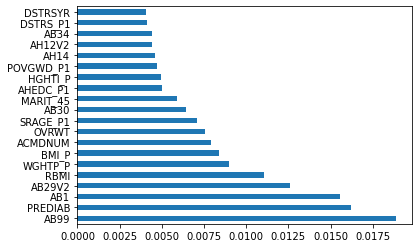

In [173]:
model.fit(X_train, y_train)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [174]:
X_train = X_train[selected_feat]
X_test = X_test[selected_feat]
X_train.shape

(132386, 281)

## Convert training and test data to CSV files

In [175]:
X_train.to_csv(r'data/X_train.csv', index = False)
X_test.to_csv(r'data/X_test.csv', index = False)
y_train.to_csv(r'data/y_train.csv', index = False)
y_test.to_csv(r'data/y_test.csv', index = False)